In [11]:
from pylab import *
from scipy.integrate import *
%run "mis_int.ipynb"
%matplotlib inline

Hay que resolver
$$\dfrac{d^2 \vec \rho}{d \tau ^2} = -\dfrac{\hat \rho}{\rho^2}$$


In [2]:
def mov_planeta(x,t):
    r3= (x[0]**2 + x[1]**2) ** (1.5)
    drx = x[2]
    dry = x[3]
    dvrx = -x[0]/r3
    dvry = -x[1]/r3
    return array([drx,dry,dvrx,dvry])

def J_mov_planeta(x,t):
    d_ec = array([0,0,0,0])
    r5 = (x[0]**2 + x[1]**2)**(2.5)
    rxmry = (2*x[0]*x[0] - x[1]*x[1])/r5
    rymrx = (2*x[1]*x[1] - x[0]*x[0])/r5
    rxry = (3*x[0]*x[1])/r5
    Jac = array( [ [0,0,1,0],[0,0,0,1],[rxmry,rxry,0,0],[rxry,rymrx,0,0] ] )
    return d_ec, Jac

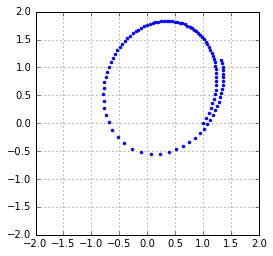

CPU times: user 200 ms, sys: 4 ms, total: 204 ms
Wall time: 204 ms


In [3]:
%%time
#t,r_vr = rk2(mov_planeta,[1,0,0,1],[0,2*pi],0.0001)
t,r_vr = rk2(mov_planeta,[1,0,.6,.9],[0,10],0.1)
#xlim([-1.5,1.5]), ylim([-1.5,1.5])
zoom=2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,0],r_vr[:,1],'.')
show()

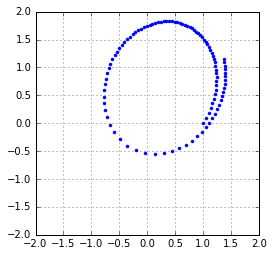

CPU times: user 172 ms, sys: 8 ms, total: 180 ms
Wall time: 179 ms


In [4]:
%%time
t,r_vr = integra2(mov_planeta,J_mov_planeta,[1,0,.6,.9],[0,10],0.1)
zoom=2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,0],r_vr[:,1],'.')
show()

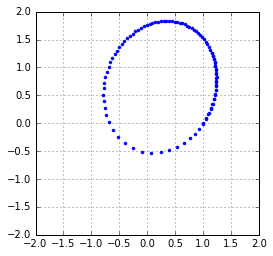

CPU times: user 192 ms, sys: 4 ms, total: 196 ms
Wall time: 193 ms


In [5]:
%%time
t,r_vr = rk4(mov_planeta,[1,0,.6,.9],[0,10],0.1)
zoom=2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,0],r_vr[:,1],'.')
show()

In [6]:
h = 0.1
tiempos = arange(0,10+h,h)

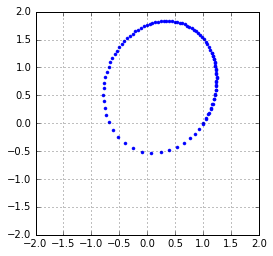

CPU times: user 208 ms, sys: 0 ns, total: 208 ms
Wall time: 206 ms


In [13]:
%%time
r_vr = odeint(mov_planeta,[1,0,.6,.9],tiempos)
zoom=2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,0],r_vr[:,1],'.')
show()

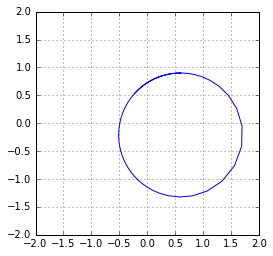

In [17]:
#ODOGRAFA
zoom=2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,2],r_vr[:,3])
show()